In [2]:
import numpy as np
import legume

import numpy as np
import legume
import matplotlib.pyplot as plt
scaling_fac = 0.226*2
H = 0.12/scaling_fac    # total height of grating
D_2= 0.05/scaling_fac
# D = 0      # thickness of added parts
epSO=1.46**2 #permitivity of added layers
epaa=1.46**2
epSN = 2.05**2   # permittivity
a= 0.0675/scaling_fac
b= 0.047/scaling_fac
# actual Ellipse dimesions a = 94/2 nm b =135/2 nm  
# c= 0.226/scaling_fac
# actual distance between two ellipse c =226nm


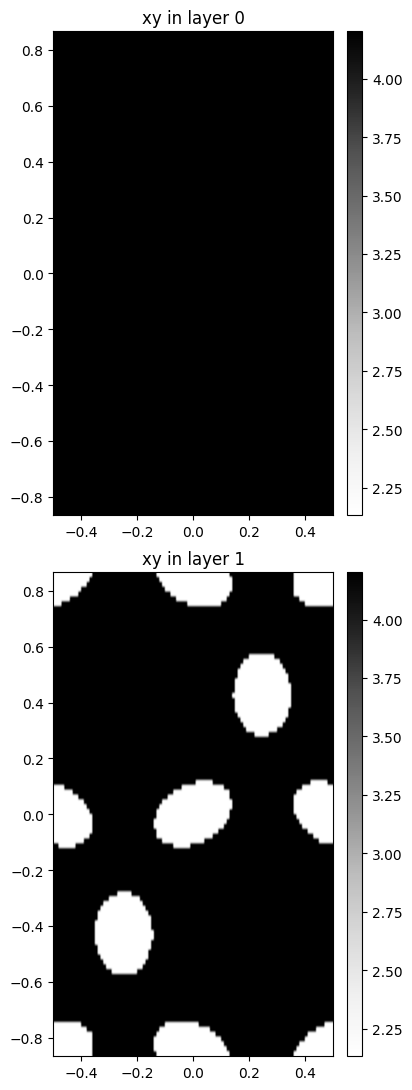

In [3]:
lattice = legume.Lattice('hexagonal')
phc = legume.PhotCryst(lattice, eps_l=epSO, eps_u=epSO)
# First layer
# phc.add_layer(d=D,eps_b=epSO)

# legume.viz.structure(phc)


    #second layer
phc.add_layer(d=D_2, eps_b=epSN)




#third layer

phc.add_layer(d=H-D_2, eps_b=epSN)
# Ellipse dimesions


#first, third and fifth line
#theta_0 = [np.pi/2, np.pi/6,5*np.pi/6]
theta = np.linspace(0, 2*np.pi, 100)
x = a*np.cos(theta)
y = b*np.sin(theta)

# first ellipse at (a/4 and sqrt(3)/4), oriented at 90 degrees
x_0 = 0.25
y_0 = np.sqrt(3)/4
theta_0 = np.pi/2
x = x_0 +  a*np.cos(theta)*np.cos(theta_0)-b*np.sin(theta)*np.sin(theta_0)
y = y_0 + b*np.sin(theta)*np.cos(theta_0)+a*np.cos(theta)*np.sin(theta_0)
ellipse = legume.Poly(eps=epaa, x_edges=x, y_edges=y)
phc.add_shape(ellipse)


# second ellipse at (0,0), oriented at 90 degrees
x_0 = 0
y_0 = 0
theta_0 = np.pi/6
x = x_0 +  a*np.cos(theta)*np.cos(theta_0)-b*np.sin(theta)*np.sin(theta_0)
y = y_0 + b*np.sin(theta)*np.cos(theta_0)+a*np.cos(theta)*np.sin(theta_0)
ellipse = legume.Poly(eps=epaa, x_edges=x, y_edges=y)
phc.add_shape(ellipse)

# third ellipse at (a/2 and 0), oriented at 90 degrees
x_0 = 0.5
y_0 = 0
theta_0 = 5*np.pi/6
x = x_0 +  a*np.cos(theta)*np.cos(theta_0)-b*np.sin(theta)*np.sin(theta_0)
y = y_0 + b*np.sin(theta)*np.cos(theta_0)+a*np.cos(theta)*np.sin(theta_0)
ellipse = legume.Poly(eps=epaa, x_edges=x, y_edges=y)
phc.add_shape(ellipse)


legume.viz.structure(phc)
    

In [4]:
# Make a BZ path along the G-X direction
path = phc.lattice.bz_path(['M','K','G','K','M'],[20])
neig = 14 # number of Bloch bands to store
gmax = 6 # truncation of reciprocal lattice vectors

# Initialize GME
gme = legume.GuidedModeExp(phc, gmax=gmax)

# Set some of the running options
options = {'gmode_inds': [1,2, 3, 4,5, 6,7,8], # Take only the modes with H in the xy-plane
           'numeig': neig,
           'verbose': False
            }

# Run the simulation
gme.run(kpoints=path['kpoints'], **options)

Plane waves used in the expansion = 97.


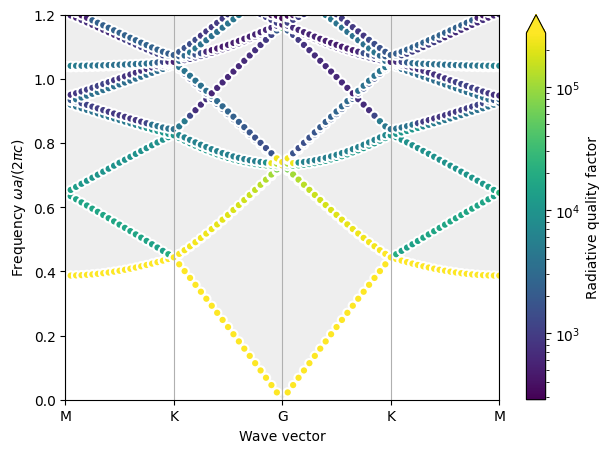

In [5]:
def plot_bands(gme):
    fig, ax = plt.subplots(1, figsize = (7, 5))
    legume.viz.bands(gme, Q=True, ax=ax)
    ax.set_xticks(path['indexes'])
    ax.set_xticklabels(path['labels'])
    ax.xaxis.grid('True')
    ax.set_ylim([0,1.2])
    
plot_bands(gme)

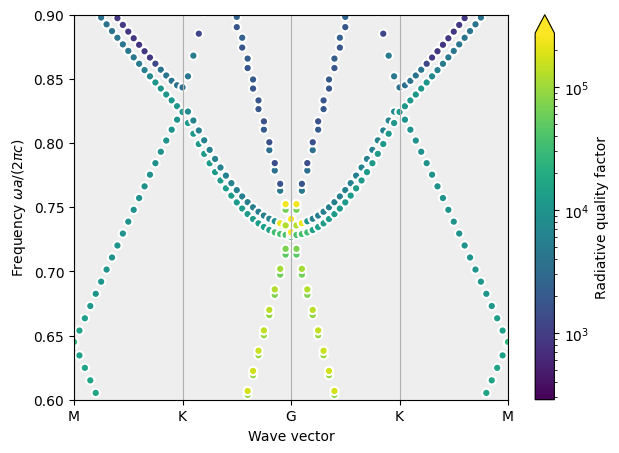

In [6]:
def plot_bands(gme):
    fig, ax = plt.subplots(1, figsize = (7, 5))
    legume.viz.bands(gme, Q=True, ax=ax)
    ax.set_xticks(path['indexes'])
    ax.set_xticklabels(path['labels'])
    ax.xaxis.grid('True')
    ax.set_ylim([0.6,0.9])
    
plot_bands(gme)

Plane waves used in the expansion = 97.


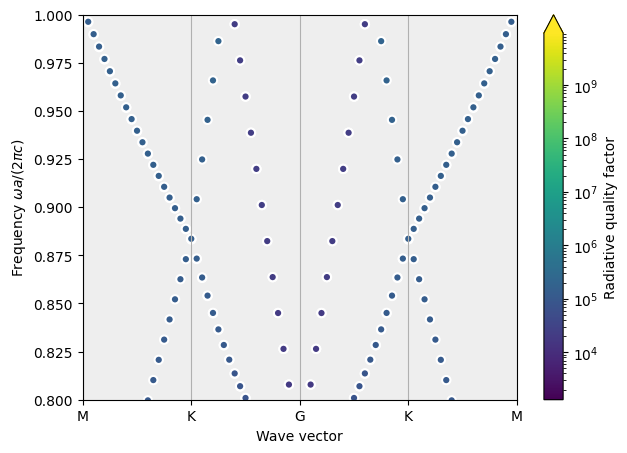

In [20]:
# Make a BZ path along the G-X direction
path = phc.lattice.bz_path(['M','K','G','K','M'],[20])
neig = 14 # number of Bloch bands to store
gmax = 6 # truncation of reciprocal lattice vectors

# Initialize GME
gme = legume.GuidedModeExp(phc, gmax=gmax)

# Set some of the running options
options = {'gmode_inds': [1,2, 3, 4,5, 6,7,8], # Take only the modes with H in the xy-plane
           'numeig': neig,
           'verbose': False
            }

# Run the simulation
gme.run(kpoints=path['kpoints'], **options)

def plot_bands(gme):
    fig, ax = plt.subplots(1, figsize = (7, 5))
    legume.viz.bands(gme, Q=True, ax=ax)
    ax.set_xticks(path['indexes'])
    ax.set_xticklabels(path['labels'])
    ax.xaxis.grid('True')
    ax.set_ylim([0.8,1.0])
    
plot_bands(gme)

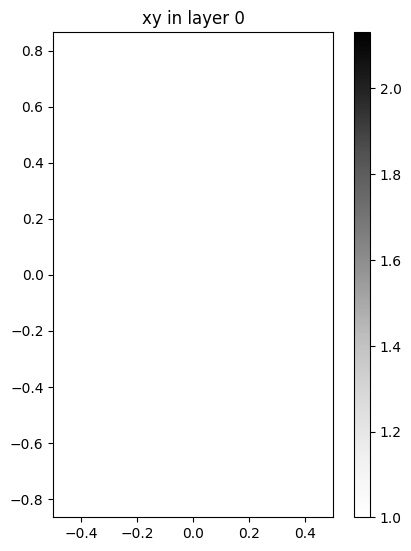

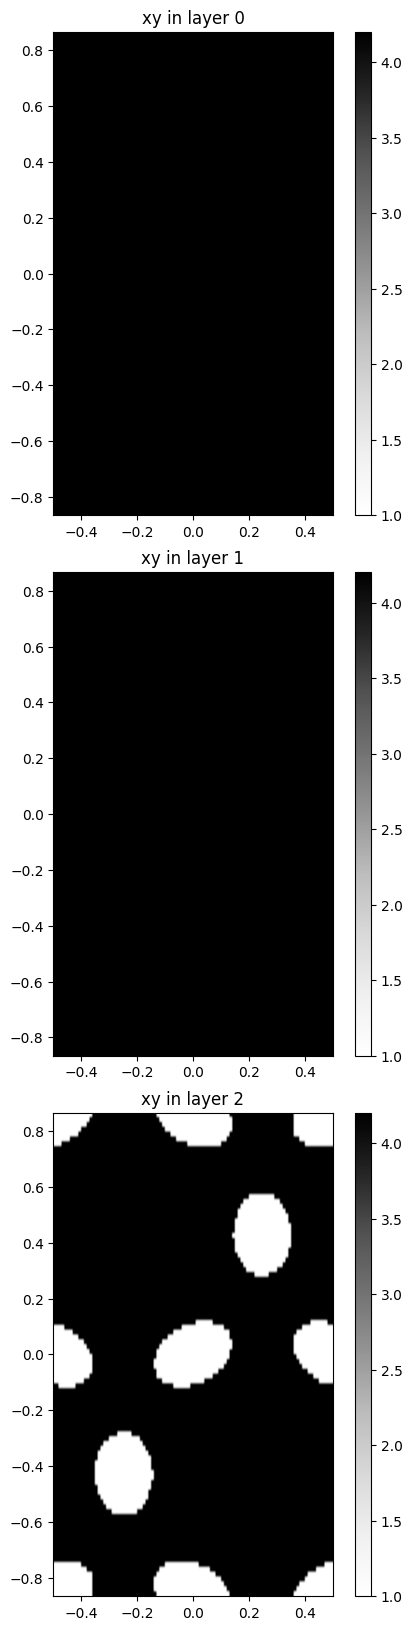

In [3]:
lattice = legume.Lattice('hexagonal')
phc = legume.PhotCryst(lattice)

# First layer
phc.add_layer(d=D,eps_b=epSO)

legume.viz.structure(phc)


    #second layer
phc.add_layer(d=D_2, eps_b=epSN)




#third layer

phc.add_layer(d=H-D-D_2, eps_b=epSN)
# Ellipse dimesions


#first, third and fifth line
#theta_0 = [np.pi/2, np.pi/6,5*np.pi/6]
theta = np.linspace(0, 2*np.pi, 100)
x = a*np.cos(theta)
y = b*np.sin(theta)

# first ellipse at (a/4 and sqrt(3)/4), oriented at 90 degrees
x_0 = 0.25
y_0 = np.sqrt(3)/4
theta_0 = np.pi/2
x = x_0 +  a*np.cos(theta)*np.cos(theta_0)-b*np.sin(theta)*np.sin(theta_0)
y = y_0 + b*np.sin(theta)*np.cos(theta_0)+a*np.cos(theta)*np.sin(theta_0)
ellipse = legume.Poly(eps=epaa, x_edges=x, y_edges=y)
phc.add_shape(ellipse)


# second ellipse at (0,0), oriented at 90 degrees
x_0 = 0
y_0 = 0
theta_0 = np.pi/6
x = x_0 +  a*np.cos(theta)*np.cos(theta_0)-b*np.sin(theta)*np.sin(theta_0)
y = y_0 + b*np.sin(theta)*np.cos(theta_0)+a*np.cos(theta)*np.sin(theta_0)
ellipse = legume.Poly(eps=epaa, x_edges=x, y_edges=y)
phc.add_shape(ellipse)

# third ellipse at (a/2 and 0), oriented at 90 degrees
x_0 = 0.5
y_0 = 0
theta_0 = 5*np.pi/6
x = x_0 +  a*np.cos(theta)*np.cos(theta_0)-b*np.sin(theta)*np.sin(theta_0)
y = y_0 + b*np.sin(theta)*np.cos(theta_0)+a*np.cos(theta)*np.sin(theta_0)
ellipse = legume.Poly(eps=epaa, x_edges=x, y_edges=y)
phc.add_shape(ellipse)


legume.viz.structure(phc)
    

In [9]:
import numpy as np
import matplotlib.pyplot as plt

from legume import PlaneWaveExp, Circle, ShapesLayer, Lattice, viz

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


ValueError: operands could not be broadcast together with shapes (81,14) (0,) 

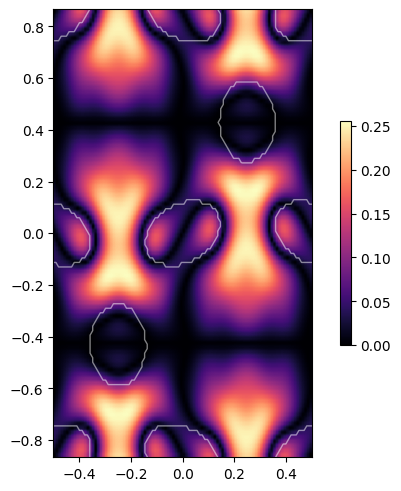

In [10]:
viz.field(gme, field='e', kind=40, mind=4,z=D_2,
            component='x', val='abs', N1=100, N2=100, cbar=True, eps=True);

In [8]:
import numpy as np
import legume

import numpy as np
import legume
import matplotlib.pyplot as plt
scaling_fac = 0.226*2*np.sqrt(3)
H = 0.12/scaling_fac    # total height of grating
D_2= 0.05/scaling_fac
# D = 0      # thickness of added parts
epSO=1.46**2 #permitivity of added layers
epaa=1.46**2
epSN = 1.98**2   # permittivity
a= 0.0675/scaling_fac
b= 0.047/scaling_fac
# actual Ellipse dimesions a = 94/2 nm b =135/2 nm  
# c= 0.226/scaling_fac
# actual distance between two ellipse c =226nm

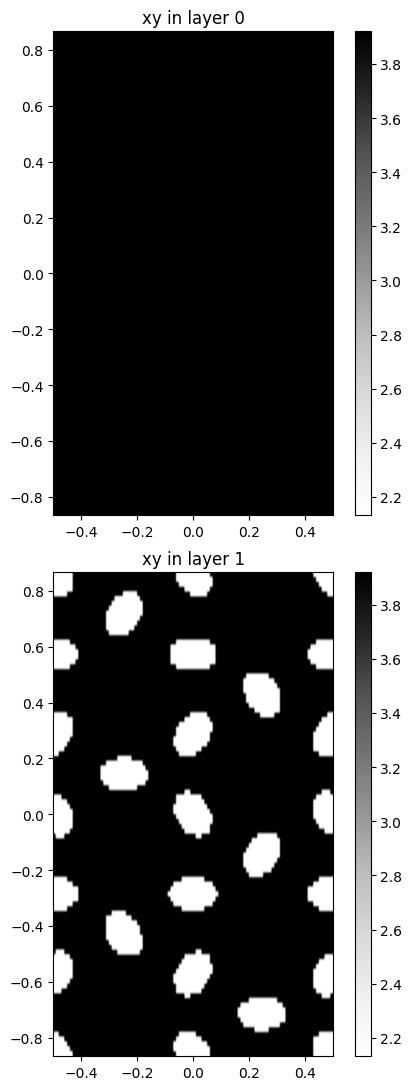

In [9]:
lattice = legume.Lattice('hexagonal')
phc = legume.PhotCryst(lattice, eps_l=epSO, eps_u=epSO)

# First layer
# phc.add_layer(d=D,eps_b=epSO)

# legume.viz.structure(phc)


    #second layer
phc.add_layer(d=D_2, eps_b=epSN)




#third layer

phc.add_layer(d=H-D_2, eps_b=epSN)
# Ellipse dimesions


#first, third and fifth line
#theta_0 = [np.pi/2, np.pi/6,5*np.pi/6]
theta = np.linspace(0, 2*np.pi, 100)
x = a*np.cos(theta)
y = b*np.sin(theta)

# first ellipse at (0,0), oriented at 120 degrees
x_0 = 0
y_0 = 0
theta_0 = 2*np.pi/3
x = x_0 +  a*np.cos(theta)*np.cos(theta_0)-b*np.sin(theta)*np.sin(theta_0)
y = y_0 + b*np.sin(theta)*np.cos(theta_0)+a*np.cos(theta)*np.sin(theta_0)
ellipse = legume.Poly(eps=epaa, x_edges=x, y_edges=y)
phc.add_shape(ellipse)


# second ellipse at (1/4,sqrt(3)/4)), oriented at 120 degrees
x_0 = 1/4
y_0 =np.sqrt(3)/4 
theta_0 = 2*np.pi/3
x = x_0 +  a*np.cos(theta)*np.cos(theta_0)-b*np.sin(theta)*np.sin(theta_0)
y = y_0 + b*np.sin(theta)*np.cos(theta_0)+a*np.cos(theta)*np.sin(theta_0)
ellipse = legume.Poly(eps=epaa, x_edges=x, y_edges=y)
phc.add_shape(ellipse)

# third ellipse at (1/2 and 0), oriented at 120 degrees
x_0 = 1/2
y_0 = 0
theta_0 = 2*np.pi/3
x = x_0 +  a*np.cos(theta)*np.cos(theta_0)-b*np.sin(theta)*np.sin(theta_0)
y = y_0 + b*np.sin(theta)*np.cos(theta_0)+a*np.cos(theta)*np.sin(theta_0)
ellipse = legume.Poly(eps=epaa, x_edges=x, y_edges=y)
phc.add_shape(ellipse)


# forth ellipse at (1/2 and 1/2*sqrt(3)), oriented at 60 degrees
x_0 = 1/2
y_0 = 1/(2*np.sqrt(3))
theta_0 = np.pi/3
x = x_0 +  a*np.cos(theta)*np.cos(theta_0)-b*np.sin(theta)*np.sin(theta_0)
y = y_0 + b*np.sin(theta)*np.cos(theta_0)+a*np.cos(theta)*np.sin(theta_0)
ellipse = legume.Poly(eps=epaa, x_edges=x, y_edges=y)
phc.add_shape(ellipse)


# fifth ellipse at (1/2,1/(*sqrt(3)), oriented at 0 degrees
x_0 = 1/2
y_0 = 1/(np.sqrt(3))
theta_0 = 0
x = x_0 +  a*np.cos(theta)*np.cos(theta_0)-b*np.sin(theta)*np.sin(theta_0)
y = y_0 + b*np.sin(theta)*np.cos(theta_0)+a*np.cos(theta)*np.sin(theta_0)
ellipse = legume.Poly(eps=epaa, x_edges=x, y_edges=y)
phc.add_shape(ellipse)

# sixth ellipse at (3/4 and 5/(np.sqrt(3))), oriented at 60 degrees
x_0 = 3/4
y_0 = 5/(4*np.sqrt(3))
theta_0 = np.pi/3
x = x_0 +  a*np.cos(theta)*np.cos(theta_0)-b*np.sin(theta)*np.sin(theta_0)
y = y_0 + b*np.sin(theta)*np.cos(theta_0)+a*np.cos(theta)*np.sin(theta_0)
ellipse = legume.Poly(eps=epaa, x_edges=x, y_edges=y)
phc.add_shape(ellipse)


# seventh ellipse at (1 and 1/sqrt(3)), oriented at 0 degrees
x_0 = 1
y_0 = 1/(np.sqrt(3))
theta_0 = 0
x = x_0 +  a*np.cos(theta)*np.cos(theta_0)-b*np.sin(theta)*np.sin(theta_0)
y = y_0 + b*np.sin(theta)*np.cos(theta_0)+a*np.cos(theta)*np.sin(theta_0)
ellipse = legume.Poly(eps=epaa, x_edges=x, y_edges=y)
phc.add_shape(ellipse)


# eighth ellipse at (1,1/(2*np.sqrt(3))), oriented at 60 degrees
x_0 = 1
y_0 = 1/(2*np.sqrt(3))
theta_0 = np.pi/3
x = x_0 +  a*np.cos(theta)*np.cos(theta_0)-b*np.sin(theta)*np.sin(theta_0)
y = y_0 + b*np.sin(theta)*np.cos(theta_0)+a*np.cos(theta)*np.sin(theta_0)
ellipse = legume.Poly(eps=epaa, x_edges=x, y_edges=y)
phc.add_shape(ellipse)

# ninth ellipse at (3/4 ,1/(4*np.sqrt(3))), oriented at 0 degrees
x_0 = 3/4
y_0 = 1/(4*np.sqrt(3))
theta_0 = 0
x = x_0 +  a*np.cos(theta)*np.cos(theta_0)-b*np.sin(theta)*np.sin(theta_0)
y = y_0 + b*np.sin(theta)*np.cos(theta_0)+a*np.cos(theta)*np.sin(theta_0)
ellipse = legume.Poly(eps=epaa, x_edges=x, y_edges=y)
phc.add_shape(ellipse)

# # tenth ellipse at (a/2 and 0), oriented at 90 degrees
# x_0 = 3/4
# y_0 = np.sqrt(3)/4
# theta_0 = 5*np.pi/6
# x = x_0 +  a*np.cos(theta)*np.cos(theta_0)-b*np.sin(theta)*np.sin(theta_0)
# y = y_0 + b*np.sin(theta)*np.cos(theta_0)+a*np.cos(theta)*np.sin(theta_0)
# ellipse = legume.Poly(eps=epaa, x_edges=x, y_edges=y)
# phc.add_shape(ellipse)

# # # eleventh ellipse at (a/2 and 0), oriented at 90 degrees
# # x_0 = 3/4
# # y_0 = np.sqrt(3)/2
# # theta_0 = 5*np.pi/6
# # x = x_0 +  a*np.cos(theta)*np.cos(theta_0)-b*np.sin(theta)*np.sin(theta_0)
# # y = y_0 + b*np.sin(theta)*np.cos(theta_0)+a*np.cos(theta)*np.sin(theta_0)
# # ellipse = legume.Poly(eps=epaa, x_edges=x, y_edges=y)
# # phc.add_shape(ellipse)

# # # twelth ellipse at (a/2 and 0), oriented at 90 degrees
# # x_0 = 3/4
# # y_0 = 3*np.sqrt(3)/4
# # theta_0 = 5*np.pi/6
# # x = x_0 +  a*np.cos(theta)*np.cos(theta_0)-b*np.sin(theta)*np.sin(theta_0)
# # y = y_0 + b*np.sin(theta)*np.cos(theta_0)+a*np.cos(theta)*np.sin(theta_0)
# # ellipse = legume.Poly(eps=epaa, x_edges=x, y_edges=y)
# # phc.add_shape(ellipse)

# # thirteenth ellipse at (a/2 and 0), oriented at 90 degrees
# x_0 = 3/8
# y_0 = 5*np.sqrt(3)/12
# theta_0 = 5*np.pi/6
# x = x_0 +  a*np.cos(theta)*np.cos(theta_0)-b*np.sin(theta)*np.sin(theta_0)
# y = y_0 + b*np.sin(theta)*np.cos(theta_0)+a*np.cos(theta)*np.sin(theta_0)
# ellipse = legume.Poly(eps=epaa, x_edges=x, y_edges=y)
# # phc.add_shape(ellipse)

# # fourteenth ellipse at (a/2 and 0), oriented at 90 degrees
# x_0 = 0
# y_0 = np.sqrt(3)/3
# theta_0 = 5*np.pi/6
# x = x_0 +  a*np.cos(theta)*np.cos(theta_0)-b*np.sin(theta)*np.sin(theta_0)
# y = y_0 + b*np.sin(theta)*np.cos(theta_0)+a*np.cos(theta)*np.sin(theta_0)
# ellipse = legume.Poly(eps=epaa, x_edges=x, y_edges=y)
# phc.add_shape(ellipse)

# # 15th ellipse at (0 and 1/sqrt(3)), oriented at 0 degrees
# x_0 = 0
# y_0 = 1/(np.sqrt(3))
# theta_0 = 0
# x = x_0 +  a*np.cos(theta)*np.cos(theta_0)-b*np.sin(theta)*np.sin(theta_0)
# y = y_0 + b*np.sin(theta)*np.cos(theta_0)+a*np.cos(theta)*np.sin(theta_0)
# ellipse = legume.Poly(eps=epaa, x_edges=x, y_edges=y)
# phc.add_shape(ellipse)




legume.viz.structure(phc)
    

Plane waves used in the expansion = 271.


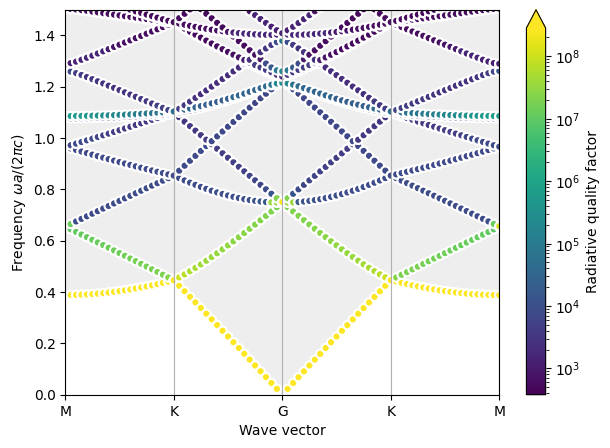

In [21]:
# Make a BZ path along the G-X direction
path = phc.lattice.bz_path(['M','K','G','K','M'],[20])
neig = 20 # number of Bloch bands to store
gmax = 10 # truncation of reciprocal lattice vectors

# Initialize GME
gme = legume.GuidedModeExp(phc, gmax=gmax)

# Set some of the running options
options = {'gmode_inds': [0,2,4,6], # Take only the modes with H in the xy-plane
           'numeig': neig,
           'verbose': False
            }

# Run the simulation
gme.run(kpoints=path['kpoints'], **options)

def plot_bands(gme):
    fig, ax = plt.subplots(1, figsize = (7, 5))
    legume.viz.bands(gme, Q=True, ax=ax)
    ax.set_xticks(path['indexes'])
    ax.set_xticklabels(path['labels'])
    ax.xaxis.grid('True')
    ax.set_ylim([0,1.5])
    
plot_bands(gme)

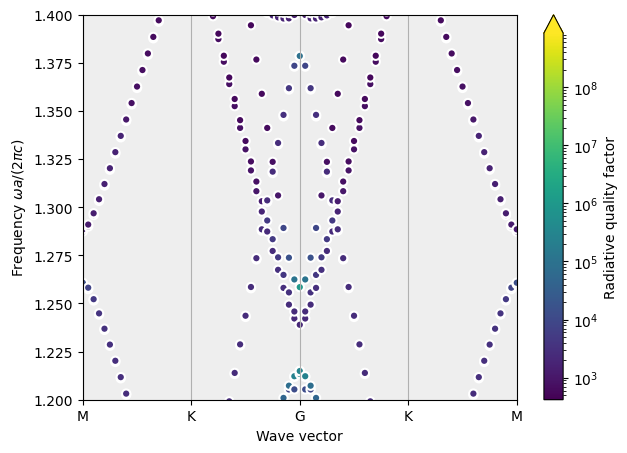

In [17]:
def plot_bands(gme):
    fig, ax = plt.subplots(1, figsize = (7, 5))
    legume.viz.bands(gme, Q=True, ax=ax)
    ax.set_xticks(path['indexes'])
    ax.set_xticklabels(path['labels'])
    ax.xaxis.grid('True')
    ax.set_ylim([1.2,1.4])
    
plot_bands(gme)

In [27]:
gme = legume.GuidedModeExp(phc, gmax=4.5, truncate_g='abs')
npw = np.shape(gme.gvec)[1]  # number of plane waves in the expansion
print('Number of reciprocal lattice vectors in the expansion: npw = ', npw)


Number of reciprocal lattice vectors in the expansion: npw =  55


In [34]:
# Run the guided-mode expansion
numeig, verbose = 20, True
nk = 20
path = lattice.bz_path(['k', 'G', 'M'], [nk])

gme.run(kpoints=path['kpoints'], gmode_inds=[0, 1, 2, 3,4,5,6,7,8,9], numeig=numeig, verbose=True)
freqs = gme.freqs

nkappa, nfreq = freqs.shape[0], freqs.shape[1]
print(f'Number of wavevectros = {nkappa}, number of frequencies = {nfreq}')


4.665s total time for real part of frequencies in GuidedModeExp, of which
  1.961s (42%) for guided modes computation using the gmode_compute='exact' method
  0.000s (0%) for inverse matrix of Fourier-space permittivity
  2.118s (45%) for matrix diagionalization using the 'eigh' solver
  0.532s (11%) for creating GME matrix
6.030s  total time for imaginary part of frequencies███████│ 41 of 41
Number of wavevectros = 41, number of frequencies = 20


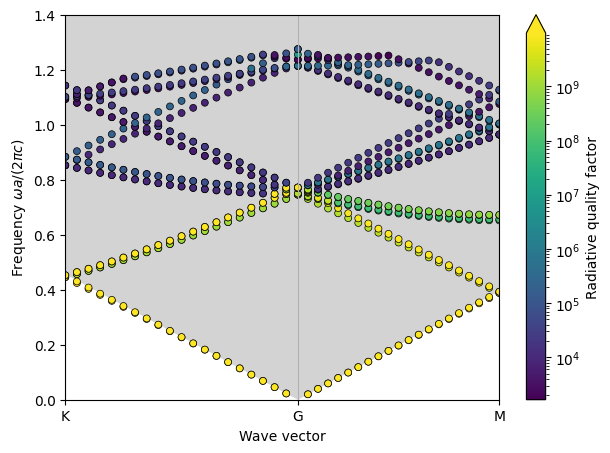

In [36]:
def plot_bands(gme):
    fig, ax = plt.subplots(1, figsize = (7 ,5))
    legume.viz.bands(gme, Q=True, ax=ax, cone=True, k_units=True, conecolor='lightgrey',
                     markersize=5, markeredgecolor='black', markeredgewidth=0.5)
    ax.set_xticks(path['k_indexes'])
    ax.set_xticklabels(path['labels'])
    ax.xaxis.grid('True')
    ax.set_ylim([0., 1.4])

plot_bands(gme)



<>:14: SyntaxWarning: invalid escape sequence '\o'
<>:14: SyntaxWarning: invalid escape sequence '\o'
/tmp/ipykernel_12240/875294332.py:14: SyntaxWarning: invalid escape sequence '\o'
  ax.set_ylabel("$\omega a/2\pi c$")
/tmp/ipykernel_12240/875294332.py:14: SyntaxWarning: invalid escape sequence '\o'
  ax.set_ylabel("$\omega a/2\pi c$")


NameError: name 'vec_LL' is not defined

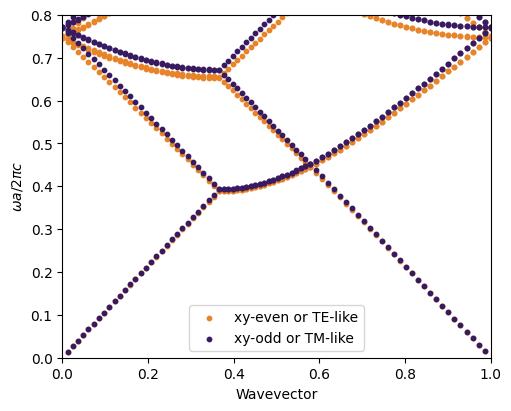

In [26]:
markersize = 10
conecolor='lightgrey'
odd_color = "#381a61"
even_color = "#E78429"

fig, ax = plt.subplots(1, constrained_layout=True, figsize=(5, 4))

plt.scatter(X, freqs_xyeven,c=even_color, label='xy-even or TE-like', s=markersize)
plt.scatter(X, freqs_xyodd, c=odd_color, label='xy-odd or TM-like', s=markersize)

ax.set_ylim([0, 0.8])
ax.set_xlim([0, 1])
ax.set_xlabel("Wavevector")
ax.set_ylabel("$\omega a/2\pi c$")
plt.legend(loc='lower center')

ax.fill_between(X0, vec_LL,  max(100, vec_LL.max(), gme.freqs[:].max()),
                facecolor=conecolor,        zorder=0)
ax.set_xticks(path['k_indexes'], path['labels'])
ax.xaxis.grid('True')